3.Buyer's ratio:

In [1]:

import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
import warnings
warnings.filterwarnings('ignore')


In [2]:
#load data:
BuyerRatio =pd.read_csv('BuyerRatio.csv')
BuyerRatio.head(10)

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [3]:
BuyerRatio.shape

(2, 5)

In [4]:
BuyerRatio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Observed Values  2 non-null      object
 1   East             2 non-null      int64 
 2   West             2 non-null      int64 
 3   North            2 non-null      int64 
 4   South            2 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 208.0+ bytes


In [5]:
BuyerRatio.describe()

,East,West,North,South
count,2.000000,2.000000,2.000000,2.000000
mean,242.500000,832.500000,743.500000,410.000000
std,272.236111,976.514465,866.205807,480.832611
min,50.000000,142.000000,131.000000,70.000000
25%,146.250000,487.250000,437.250000,240.000000
50%,242.500000,832.500000,743.500000,410.000000
75%,338.750000,1177.750000,1049.750000,580.000000
max,435.000000,1523.000000,1356.000000,750.000000


In [6]:
East=BuyerRatio['East'].mean()
print('East Mean = ',East)

East Mean =  242.5


In [7]:
West=BuyerRatio['West'].mean()
print('West Mean = ',West)

West Mean =  832.5


In [8]:
North=BuyerRatio['North'].mean()
print('North Mean = ',North)

North Mean =  743.5


In [9]:
South=BuyerRatio['South'].mean()
print('South Mean = ',South)


South Mean =  410.0


#The Null and Alternative Hypothesis

There are no significant differences between the groups' mean values. H0:μ1=μ2=μ3=μ4=μ5

There is a significant difference between the groups' mean values. Ha:μ1≠μ2≠μ3≠μ4


<AxesSubplot:xlabel='East', ylabel='Density'>

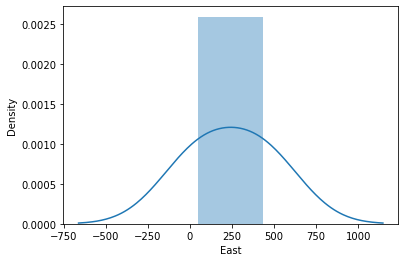

In [10]:
#EDA:
sns.distplot(BuyerRatio['East'])

<AxesSubplot:xlabel='West', ylabel='Density'>

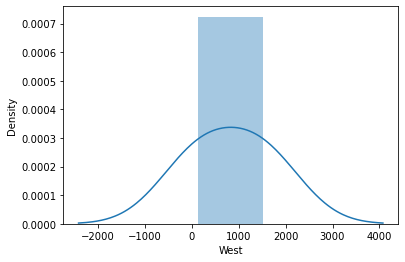

In [11]:
sns.distplot(BuyerRatio['West'])

<AxesSubplot:xlabel='North', ylabel='Density'>

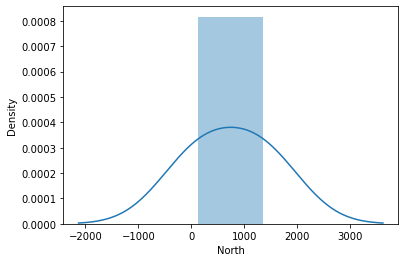

In [12]:
sns.distplot(BuyerRatio['North'])

<AxesSubplot:xlabel='South', ylabel='Density'>

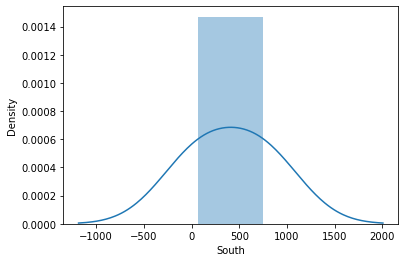

In [13]:
sns.distplot(BuyerRatio['South'])

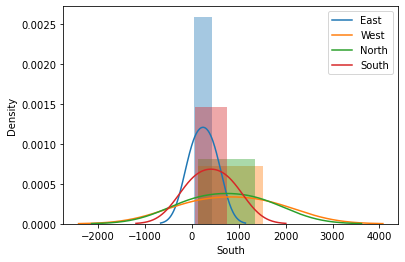

In [14]:
sns.distplot(BuyerRatio['East'])
sns.distplot(BuyerRatio['West'])
sns.distplot(BuyerRatio['North'])
sns.distplot(BuyerRatio['South'])
plt.legend(['East','West','North','South'])


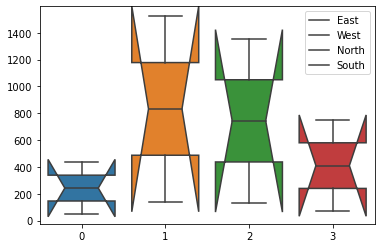

In [15]:
sns.boxplot(data=[BuyerRatio['East'],BuyerRatio['West'],BuyerRatio['North'],BuyerRatio['South']],notch=True)
plt.legend(['East','West','North','South'])


In [16]:
alpha=0.05
Male = [50,142,131,70]
Female=[435,1523,1356,750]
Sales=[Male,Female]
print(Sales)

[[50, 142, 131, 70], [435, 1523, 1356, 750]]


In [17]:
chiStats = sp.stats.chi2_contingency(Sales)
print('Test t=%f p-value=%f' % (chiStats[0], chiStats[1]))
print('Interpret by p-Value')


Test t=1.595946 p-value=0.660309
Interpret by p-Value


In [18]:
if chiStats[1] < 0.05:
  print('we reject null hypothesis')
else:
  print('we accept null hypothesis')



we accept null hypothesis


In [19]:
#Critical value:
alpha = 0.05
critical_value = sp.stats.chi2.ppf(q = 1 - alpha,df=chiStats[2])
critical_value 

7.814727903251179

In [20]:
# Degree of Freedom
observed_chi_val = chiStats[0]
print('Interpret by critical value')

Interpret by critical value


In [21]:
if observed_chi_val <= critical_value:
    print ('Null hypothesis cannot be rejected (variables are not related)')
else:
    print ('Null hypothesis cannot be excepted (variables are not independent)')


Null hypothesis cannot be rejected (variables are not related)


#Inference : proportion of male and female across regions is same

4.TeleCall uses 4 centers around the globe to process customer order forms. They audit a certain %  of the customer order forms. Any error in order form renders it defective and has to be reworked before processing.  The manager wants to check whether the defective %  varies by centre. Please analyze the data at 5% significance level and help the manager draw appropriate inferences


In [22]:
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest


In [23]:
Customer = pd.read_csv('Costomer+OrderForm.csv')
Customer.head(10)


,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free
5,Error Free,Error Free,Error Free,Error Free
6,Error Free,Defective,Error Free,Error Free
7,Error Free,Error Free,Error Free,Error Free
8,Error Free,Error Free,Error Free,Error Free
9,Error Free,Error Free,Error Free,Error Free


In [24]:
Customer.shape

(300, 4)

In [25]:
Customer.dtypes

Phillippines    object
Indonesia       object
Malta           object
India           object
dtype: object

In [26]:
Customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Phillippines  300 non-null    object
 1   Indonesia     300 non-null    object
 2   Malta         300 non-null    object
 3   India         300 non-null    object
dtypes: object(4)
memory usage: 9.5+ KB


In [27]:
Customer.describe()

,Phillippines,Indonesia,Malta,India
count,300,300,300,300
unique,2,2,2,2
top,Error Free,Error Free,Error Free,Error Free
freq,271,267,269,280


In [28]:
Phillippines_value=Customer['Phillippines'].value_counts()
print(Phillippines_value)


Error Free    271
Defective      29
Name: Phillippines, dtype: int64


In [29]:
Indonesia_value=Customer['Indonesia'].value_counts()
print(Indonesia_value)

Error Free    267
Defective      33
Name: Indonesia, dtype: int64


In [30]:
Malta_value=Customer['Malta'].value_counts()
print(Malta_value)

Error Free    269
Defective      31
Name: Malta, dtype: int64


In [31]:
India_value=Customer['India'].value_counts()
print(India_value)


Error Free    280
Defective      20
Name: India, dtype: int64


In [32]:
chiStats = sp.stats.chi2_contingency([[271,267,269,280],[29,33,31,20]])

In [33]:
print('Test t=%f p-value=%f' % (chiStats[0], chiStats[1]))
print('Interpret by p-Value')


Test t=3.858961 p-value=0.277102
Interpret by p-Value


In [34]:
if chiStats[1] < 0.05:
  print('we reject null hypothesis')
else:
  print('we accept null hypothesis')

we accept null hypothesis


In [35]:
#critical value = 0.1
alpha = 0.05
critical_value = sp.stats.chi2.ppf(q = 1 - alpha,df=chiStats[2])
observed_chi_val = chiStats[0]



In [36]:
print('Interpret by critical value')


Interpret by critical value


In [37]:
if observed_chi_val <= critical_value:
       print ('Null hypothesis cannot be rejected (variables are not related)')
else:
       print ('Null hypothesis cannot be excepted (variables are not independent)')


Null hypothesis cannot be rejected (variables are not related)


#Inference is that proportion of defective % across the center is same.